In [37]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import warnings
warnings.filterwarnings("ignore")


In [50]:
import os
dirs = os.listdir('../datasets')
dirs = ["../datasets/"+x for x in dirs if x[-3:]=="csv"]
dirs.pop(1)
dirs.pop(1)
print(dirs)

def describe(df):
    """Return a Pandas dataframe describing the contents of a source dataframe including missing values."""
    
    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
    
    
    for item in df.columns:
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())
        

    output = pd.DataFrame({
        'variable': variables, 
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing value': missing
    })    
        
    return output

def read(dir):
    data = pd.read_csv(dir)
    df = pd.DataFrame(data)
    pd.set_option('display.max_columns', None)
    df.describe(include='all')
    df.info()
    describe(df)
    df["Date"] = pd.to_datetime(df['Date'], errors='coerce')
    return df

described_data = {}
for path in dirs:
    described_data[path.split("/")[-1][:-4]] = pd.read_csv(path)
print(
described_data.keys()
)

for key in described_data.keys():
    print(key)
    print(describe(described_data[key]))
    print("\n")

['../datasets/META.csv', '../datasets/MSFT.csv', '../datasets/NVDA.csv']
dict_keys(['META', 'MSFT', 'NVDA'])
META
    variable    dtype  count  unique  missing value
0       Date   object    251     251              0
1       Open  float64    251     251              0
2       High  float64    251     245              0
3        Low  float64    251     249              0
4      Close  float64    251     249              0
5  Adj Close  float64    251     250              0
6     Volume    int64    251     251              0


MSFT
    variable    dtype  count  unique  missing value
0       Date   object    251     251              0
1       Open  float64    251     247              0
2       High  float64    251     246              0
3        Low  float64    251     244              0
4      Close  float64    251     246              0
5  Adj Close  float64    251     250              0
6     Volume    int64    251     251              0


NVDA
    variable    dtype  count  unique  mi

# Analyzing Correlation of Data

In [51]:
colnames = []
for ticker in described_data.keys():
    data = described_data[ticker]
    # print(data.columns)
    if len(colnames) == 0:
        combined = data[["Adj Close"]].copy()
    else:
        combined = combined.join(data[["Adj Close"]], rsuffix=ticker)
    colnames.append(ticker)
combined.columns = [colname + "_Adj_Close" for colname in colnames]
print(combined.head())

   META_Adj_Close  MSFT_Adj_Close  NVDA_Adj_Close
0      233.022766      306.137421      291.416534
1      233.122650      304.500885      285.618378
2      232.832962      309.767609      288.757385
3      235.540085      307.585541      285.688385
4      233.562180      306.454834      283.309113


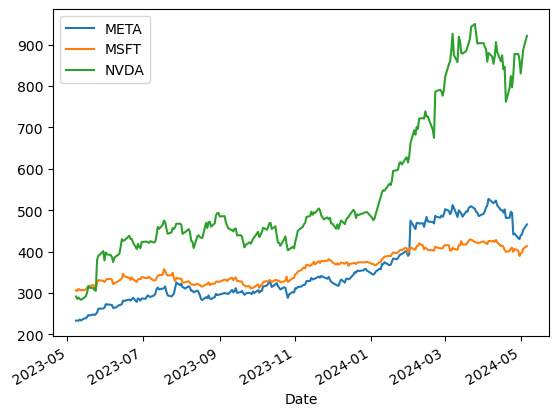

In [52]:
for ticker in described_data.keys():
    data = described_data[ticker]
    try:
        data["Date"] = pd.to_datetime(data["Date"])
    except:
        data["Date"] = pd.to_datetime(data["Date"], format="%Y-%m-%d")
    data.set_index("Date", inplace=True)
    data["Adj Close"].plot()

plt.legend(described_data.keys())
plt.show()


                META_Adj_Close  MSFT_Adj_Close  NVDA_Adj_Close
META_Adj_Close        1.000000        0.536213        0.433653
MSFT_Adj_Close        0.536213        1.000000        0.521241
NVDA_Adj_Close        0.433653        0.521241        1.000000


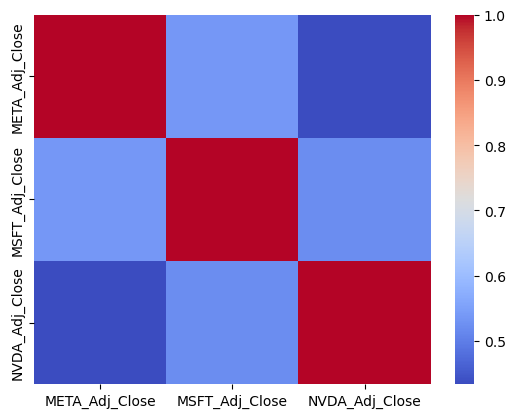

In [57]:
corr_data = combined.pct_change()
corr = corr_data.corr(method='pearson')
print(corr)
sns.heatmap(corr, cmap='coolwarm')
plt.show()

# Analyse

# Reference

https://www.kaggle.com/code/konradb/ts-3-time-series-for-finance

https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm

https://www.kaggle.com/code/kashnitsky/topic-9-part-1-time-series-analysis-in-python

https://www.youtube.com/watch?v=ZAAuGEVJsH8&t=23s

https://www.youtube.com/watch?v=ZAAuGEVJsH8&t=23s